# Online Retail Sales Exploratory Data Analysis

This notebook explores the online retail dataset to understand and extract some information that might be useful in modeling sales forcasting task.

## Import Libraries

In [106]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose
from scipy.stats import zscore


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Data Preparation

In [115]:
file_path = "/content/drive/MyDrive/Sales Data/Online Retail.xlsx" # an excel file takes longer time to load

df_original = pd.read_excel(file_path, sheet_name="Online Retail")

In [119]:
df_original

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Weekday,TotalSales
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,Weekday,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,Weekday,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,Weekday,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,Weekday,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,Weekday,20.34
...,...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France,Weekday,10.20
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,Weekday,12.60
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,Weekday,16.60
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,Weekday,16.60


The dataset contains 541,909 entries and 8 columns



1. From the provided dataset, the columns that are of interest for our analysis of future sales forecasting for the year 2012 are "InvoiceDate", "UnitPrice", and "Quantity".
2. The objective is to forecast the sales for each day in 2012. So the timeseries interval is 'Day'. 'InvoiceDate' provides the timestamp of each sale. They can be resampled on 'day' intervals. 'UnitPrice' and 'Quantity' must be multiplied and aggregated to get the total sales of each day --> TotalSales = Quantity * UnitPrice





In [5]:
df_original.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [6]:
df_original.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [10]:
df_original[df_original['Quantity']<0]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
141,C536379,D,Discount,-1,2010-12-01 09:41:00,27.50,14527.0,United Kingdom
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,2010-12-01 09:49:00,4.65,15311.0,United Kingdom
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,2010-12-01 10:24:00,1.65,17548.0,United Kingdom
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom
...,...,...,...,...,...,...,...,...
540449,C581490,23144,ZINC T-LIGHT HOLDER STARS SMALL,-11,2011-12-09 09:57:00,0.83,14397.0,United Kingdom
541541,C581499,M,Manual,-1,2011-12-09 10:28:00,224.69,15498.0,United Kingdom
541715,C581568,21258,VICTORIAN SEWING BOX LARGE,-5,2011-12-09 11:57:00,10.95,15311.0,United Kingdom
541716,C581569,84978,HANGING HEART JAR T-LIGHT HOLDER,-1,2011-12-09 11:58:00,1.25,17315.0,United Kingdom


In [11]:
df_original[df_original['UnitPrice']<0]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
299983,A563186,B,Adjust bad debt,1,2011-08-12 14:51:00,-11062.06,NaN,United Kingdom
299984,A563187,B,Adjust bad debt,1,2011-08-12 14:52:00,-11062.06,NaN,United Kingdom


Observations:
1. There are negative values in Quantity and UnitPrice.
2. Since it is a Online Retail sales dataset, the negative price in Quantity can be returned items or cancelled items. In UnitPrice the negative prices might be charge by the retailer, such as "Adjust bad debt" provided in the description.

In [7]:
df_original.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [14]:
df_original[df_original['CustomerID'].isna()]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
622,536414,22139,NaN,56,2010-12-01 11:52:00,0.00,NaN,United Kingdom
1443,536544,21773,DECORATIVE ROSE BATHROOM BOTTLE,1,2010-12-01 14:32:00,2.51,NaN,United Kingdom
1444,536544,21774,DECORATIVE CATS BATHROOM BOTTLE,2,2010-12-01 14:32:00,2.51,NaN,United Kingdom
1445,536544,21786,POLKADOT RAIN HAT,4,2010-12-01 14:32:00,0.85,NaN,United Kingdom
1446,536544,21787,RAIN PONCHO RETROSPOT,2,2010-12-01 14:32:00,1.66,NaN,United Kingdom
...,...,...,...,...,...,...,...,...
541536,581498,85099B,JUMBO BAG RED RETROSPOT,5,2011-12-09 10:26:00,4.13,NaN,United Kingdom
541537,581498,85099C,JUMBO BAG BAROQUE BLACK WHITE,4,2011-12-09 10:26:00,4.13,NaN,United Kingdom
541538,581498,85150,LADIES & GENTLEMEN METAL SIGN,1,2011-12-09 10:26:00,4.96,NaN,United Kingdom
541539,581498,85174,S/4 CACTI CANDLES,1,2011-12-09 10:26:00,10.79,NaN,United Kingdom


In [16]:
df_original[df_original['Description'].isna()]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
622,536414,22139,NaN,56,2010-12-01 11:52:00,0.0,NaN,United Kingdom
1970,536545,21134,NaN,1,2010-12-01 14:32:00,0.0,NaN,United Kingdom
1971,536546,22145,NaN,1,2010-12-01 14:33:00,0.0,NaN,United Kingdom
1972,536547,37509,NaN,1,2010-12-01 14:33:00,0.0,NaN,United Kingdom
1987,536549,85226A,NaN,1,2010-12-01 14:34:00,0.0,NaN,United Kingdom
...,...,...,...,...,...,...,...,...
535322,581199,84581,NaN,-2,2011-12-07 18:26:00,0.0,NaN,United Kingdom
535326,581203,23406,NaN,15,2011-12-07 18:31:00,0.0,NaN,United Kingdom
535332,581209,21620,NaN,6,2011-12-07 18:35:00,0.0,NaN,United Kingdom
536981,581234,72817,NaN,27,2011-12-08 10:33:00,0.0,NaN,United Kingdom


There are no missing values in the original columns for "Quantity", "UnitPrice" and "InvoiceDate". There are significant missing values in Description and CustomerID which is not really important for the analysis. Also the missing values in 'Description' has no UnitPrice. This indicates some sales might have no revenue.

Calculate Total Sales for each transaction in new column named "TotalSales"

In [ ]:
# Calculate the 'TotalSales' column for the original dataset
df_original['TotalSales'] = df_original['Quantity'] * df_original['UnitPrice']

In [ ]:
sales_df = df_original.copy()

# view df
sales_df

So for the analysis we can consider "Quanity", "InvoiceDate", "UnitPrice", "Country".

In [18]:
sales_df.drop(columns=['InvoiceNo', 'StockCode', 'Description', 'CustomerID'], inplace=True)

In [19]:
# Convert the 'InvoiceDate' column to datetime format
sales_df['InvoiceDate'] = pd.to_datetime(sales_df['InvoiceDate'])

In [21]:
sales_df

,Quantity,InvoiceDate,UnitPrice,Country,TotalSales
0,6,2010-12-01 08:26:00,2.55,United Kingdom,15.30
1,6,2010-12-01 08:26:00,3.39,United Kingdom,20.34
2,8,2010-12-01 08:26:00,2.75,United Kingdom,22.00
3,6,2010-12-01 08:26:00,3.39,United Kingdom,20.34
4,6,2010-12-01 08:26:00,3.39,United Kingdom,20.34
...,...,...,...,...,...
541904,12,2011-12-09 12:50:00,0.85,France,10.20
541905,6,2011-12-09 12:50:00,2.10,France,12.60
541906,4,2011-12-09 12:50:00,4.15,France,16.60
541907,4,2011-12-09 12:50:00,4.15,France,16.60


## Analysis

### Time Range covered by the dataset


In [22]:
# Determine the time range covered by the dataset
min_date = sales_df['InvoiceDate'].min()
max_date = sales_df['InvoiceDate'].max()

min_date, max_date

(Timestamp('2010-12-01 08:26:00'), Timestamp('2011-12-09 12:50:00'))

In [26]:
print(f"Total number of days in the dataset : {(max_date-min_date).days}")

Total number of days in the dataset : 373


The starting date is from 1st December 2010 to 9th December 2011.
Total number of days in the dataset : 373

### The distributions of Quantity, UnitPrice and TotalSales

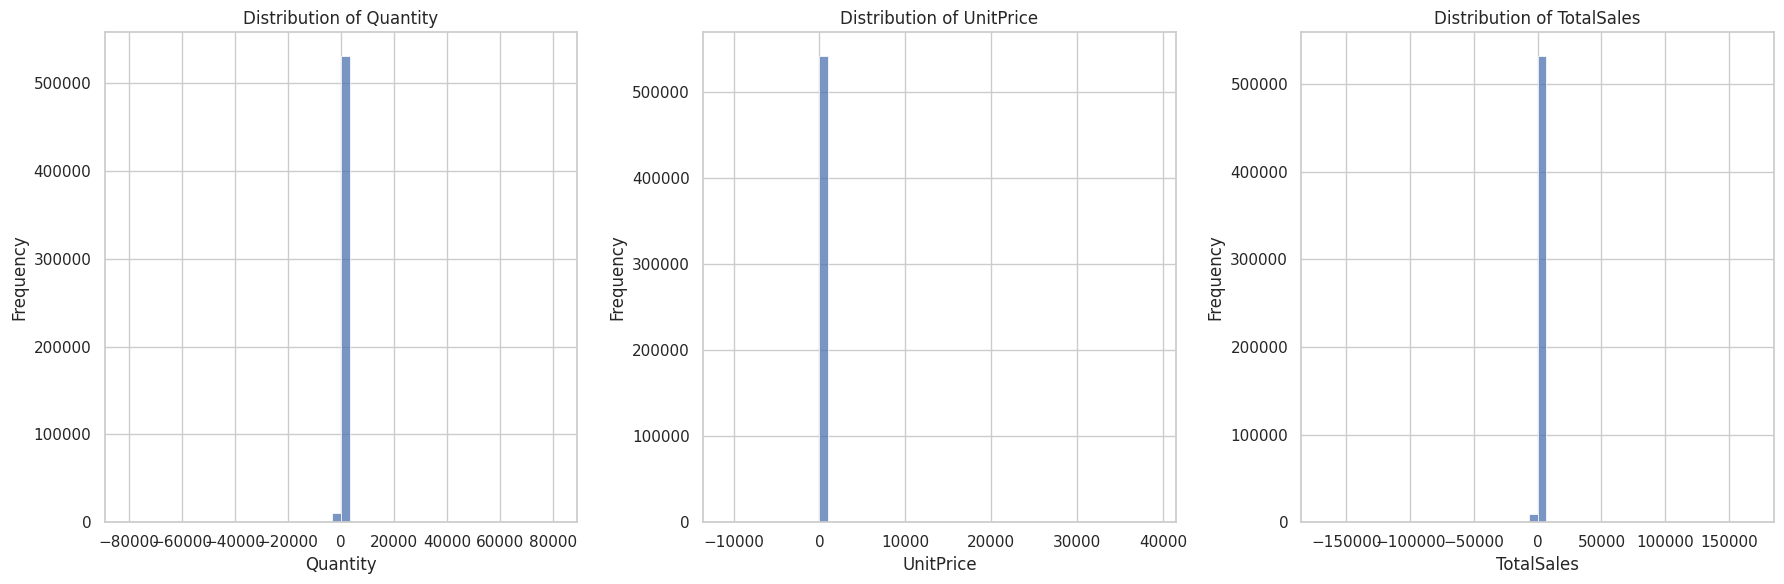

In [27]:
# Set the style for the plots
sns.set(style="whitegrid")

# Create subplots for Quantity, UnitPrice, and TotalSales
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Plot the distribution for Quantity
sns.histplot(sales_df['Quantity'], bins=50, kde=False, ax=axes[0])
axes[0].set_title('Distribution of Quantity')
axes[0].set_xlabel('Quantity')
axes[0].set_ylabel('Frequency')

# Plot the distribution for UnitPrice
sns.histplot(sales_df['UnitPrice'], bins=50, kde=False, ax=axes[1])
axes[1].set_title('Distribution of UnitPrice')
axes[1].set_xlabel('UnitPrice')
axes[1].set_ylabel('Frequency')

# Plot the distribution for TotalSales
sns.histplot(sales_df['TotalSales'], bins=50, kde=False, ax=axes[2])
axes[2].set_title('Distribution of TotalSales')
axes[2].set_xlabel('TotalSales')
axes[2].set_ylabel('Frequency')

# Show the plots
plt.tight_layout()
plt.show()

Almost all the values are concentrated on single bin lower in number as the dataset is not yet aggregated. There are also negative values as expected. From the distribution we can see there are long tails indicating outliers.

### Countries that produced most transactions

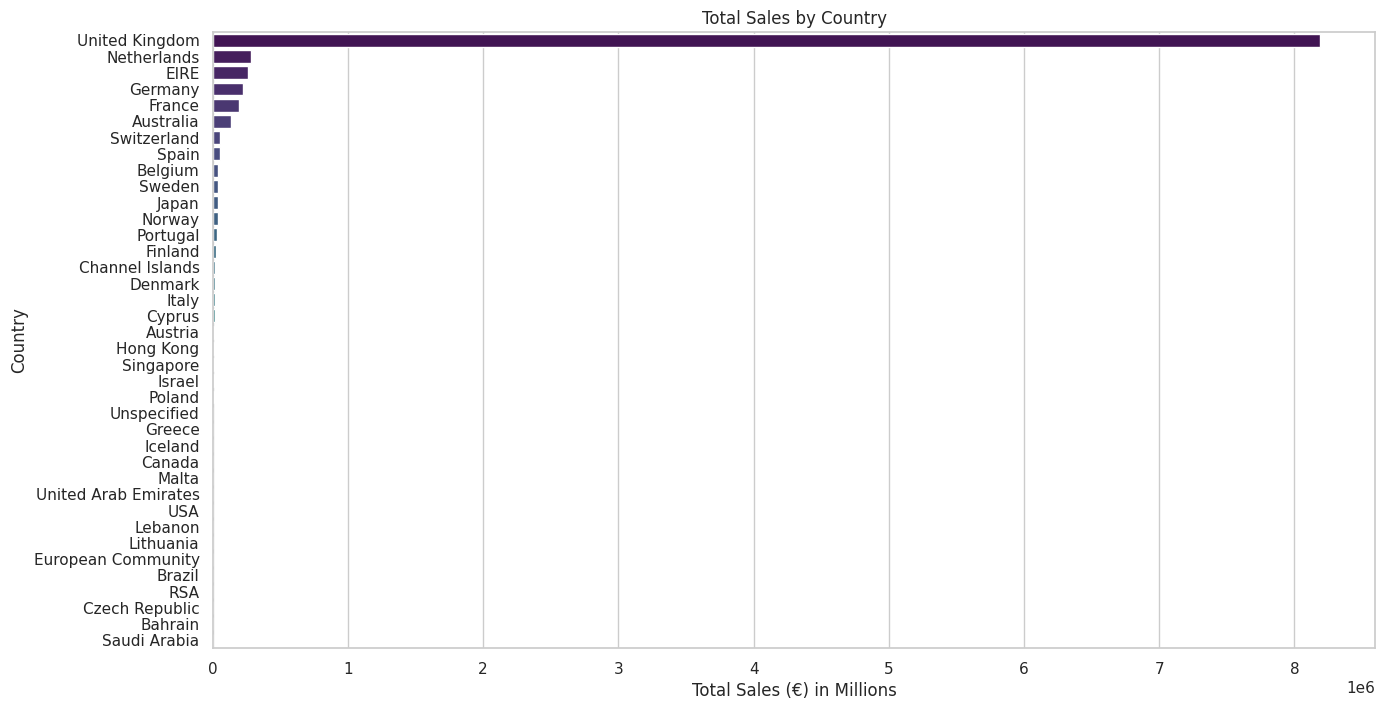

In [29]:
# Group the data by Country and sum the TotalSales
country_sales = sales_df.groupby('Country')['TotalSales'].sum().sort_values(ascending=False)

# Plot the sales data by country
plt.figure(figsize=(15, 8))
sns.barplot(x=country_sales.values, y=country_sales.index, palette='viridis')
plt.title('Total Sales by Country')
plt.xlabel('Total Sales (€) in Millions')
plt.ylabel('Country')
plt.show()

As this is retailer is based out of UK, as expected UK ranks 1st in the number of sales followed by Netherlands, Irelands and Germany.

### The daily, weekly and monthly sales trends



<ipython-input-30-2d213172ba08>:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_daily = sales_df.resample('D').sum()['TotalSales']
<ipython-input-30-2d213172ba08>:4: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_weekly = sales_df.resample('W-MON').sum()['TotalSales']
<ipython-input-30-2d213172ba08>:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_monthly = sales_df.resample('M').sum()['TotalSales']


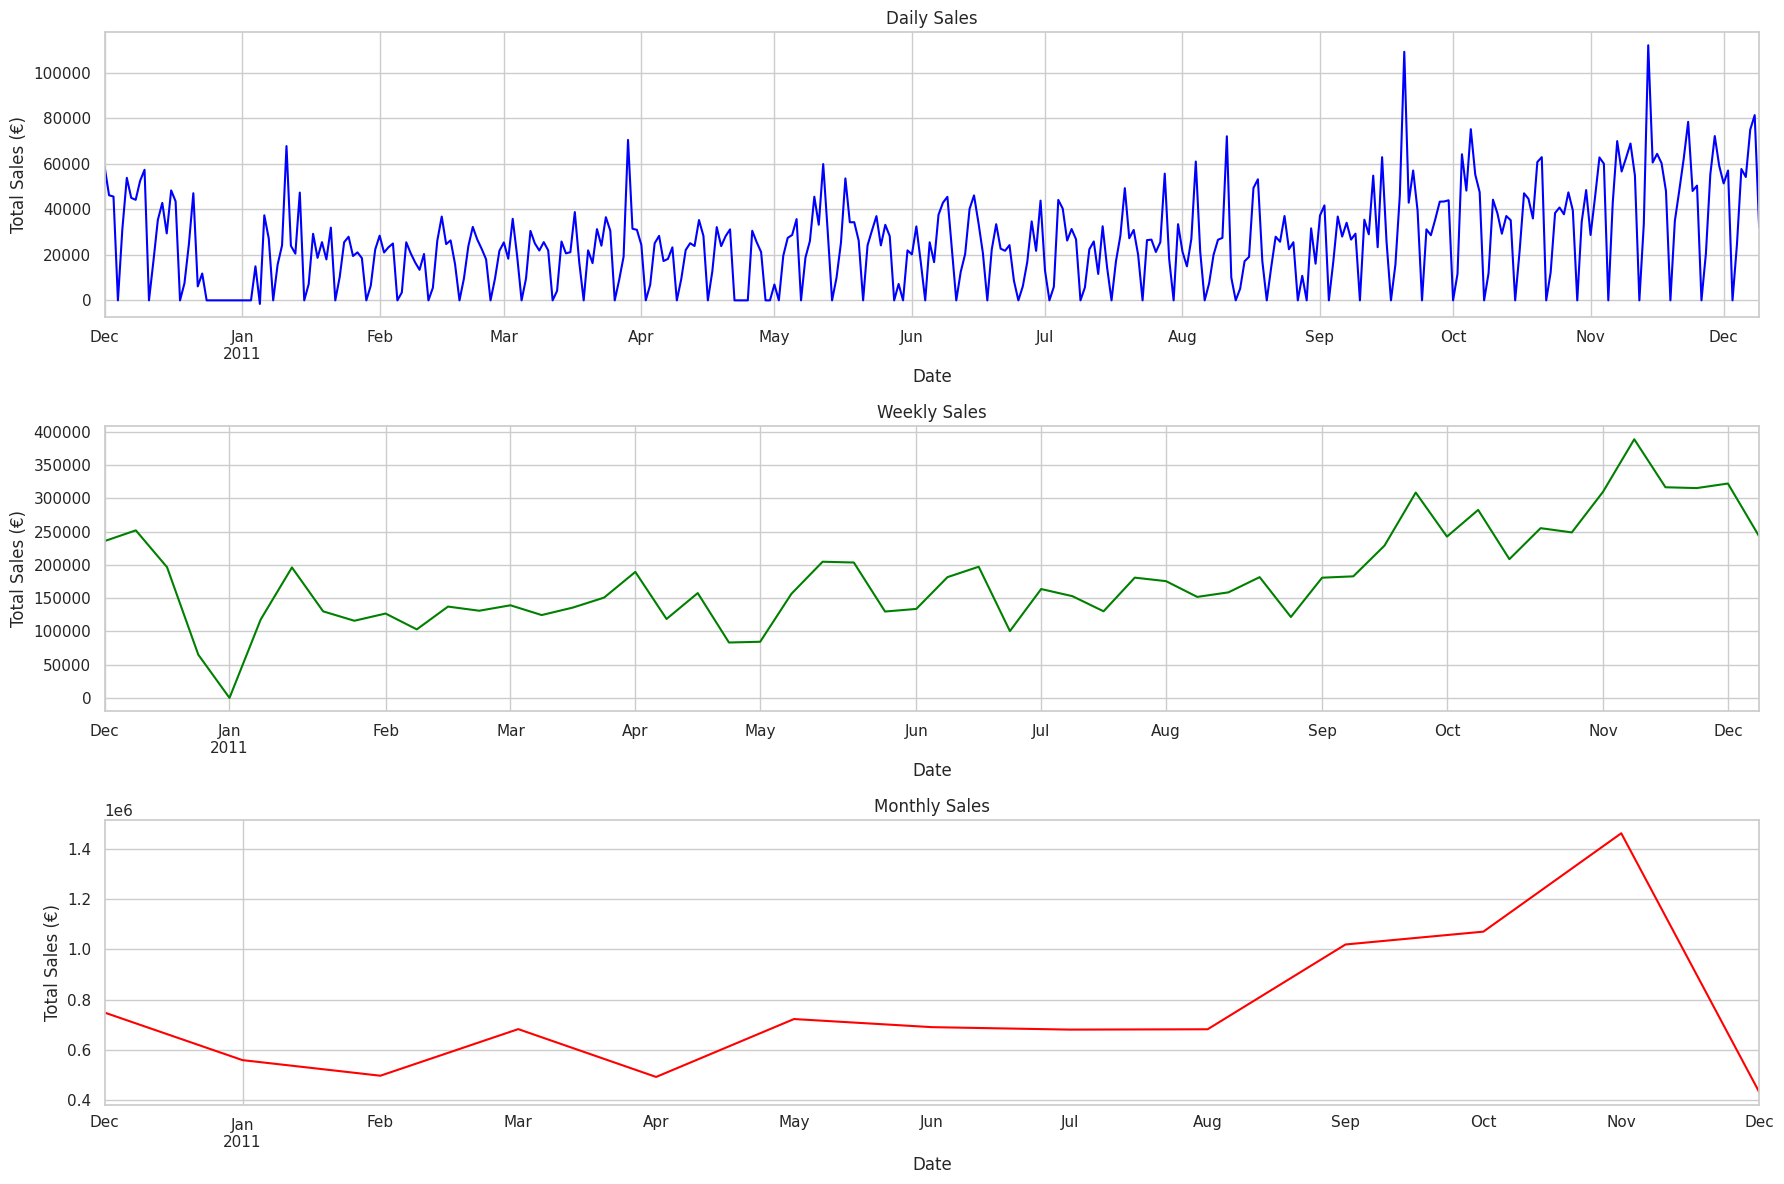

In [30]:
# Resample the data to get daily, weekly, and monthly total sales
sales_df.set_index('InvoiceDate', inplace=True)
df_daily = sales_df.resample('D').sum()['TotalSales']
df_weekly = sales_df.resample('W-MON').sum()['TotalSales']
df_monthly = sales_df.resample('M').sum()['TotalSales']

# Create subplots for daily, weekly, and monthly total sales
fig, axes = plt.subplots(3, 1, figsize=(18, 12))

# Plot daily sales
df_daily.plot(ax=axes[0], title='Daily Sales', color='blue')
axes[0].set_xlabel('Date')
axes[0].set_ylabel('Total Sales (€)')

# Plot weekly sales
df_weekly.plot(ax=axes[1], title='Weekly Sales', color='green')
axes[1].set_xlabel('Date')
axes[1].set_ylabel('Total Sales (€)')

# Plot monthly sales
df_monthly.plot(ax=axes[2], title='Monthly Sales', color='red')
axes[2].set_xlabel('Date')
axes[2].set_ylabel('Total Sales (€)')

# Show the plots
plt.tight_layout()
plt.show()

- Based on the above graphs, there are clear trends on a daily, weekly and monthly basis.
- The sales are increasing during the end of the year. Since it is an all occassion gift shop, the holiday seasons might bring more business driving the revenue up.
- There are noticeable fluctuations in daily sales, with some spikes that could be linked to promotions, holidays, or specific events.




### Missing values

In [121]:
# Average daily sales before filling 0 values
df_daily.values.mean()

26063.497149732622

In [85]:
# df_daily contains 0 values for certain days.
df_daily[df_daily.values==0.0]

InvoiceDate
2010-12-04    0.0
2010-12-11    0.0
2010-12-18    0.0
2010-12-24    0.0
2010-12-25    0.0
             ... 
2011-11-05    0.0
2011-11-12    0.0
2011-11-19    0.0
2011-11-26    0.0
2011-12-03    0.0
Name: TotalSales, Length: 69, dtype: float64

There are 69 days with 0 sales. This indicates either these values are missing from the dataset or a transaction did not happen. For the purpose of this analysis we will assume that these are missing values and we will handle them by filling it with the recent data in the past as it might help in forecasting.

<ipython-input-92-c28c5375c2f6>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_daily = sales_df.resample('D').sum()['TotalSales']


<Axes: title={'center': 'Daily Sales'}, xlabel='InvoiceDate'>

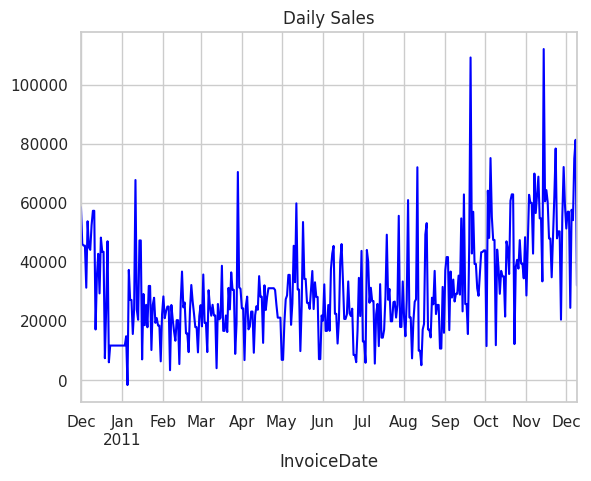

In [92]:
# Replace missing values
df_daily_fill = df_daily.replace(0, method='ffill')

# Plot daily sales after filling the missing values
df_daily_fill.plot(title='Daily Sales', color='blue')


In [122]:
# Average daily sales after filling 0 values
df_daily_fill.values.mean()

30957.81434491979

Filling the missing values with past values seems reasonable as it does not provide any strong deviations in the values.

### Negative values

In [100]:
neg_row = df_daily[df_daily.values<0.0]

In [103]:
mask = (sales_df.index.date == pd.Timestamp(neg_row.index[0]).date())
neg_val_df = sales_df[mask]

In [104]:
neg_val_df[neg_val_df['TotalSales']<0]

,Quantity,UnitPrice,Country,TotalSales
InvoiceDate,,,,
2011-01-05 09:55:00,-1,16888.02,United Kingdom,-16888.02
2011-01-05 09:57:00,-1,16453.71,United Kingdom,-16453.71
2011-01-05 10:46:00,-3,2.55,Italy,-7.65
2011-01-05 10:50:00,-2,2.95,Portugal,-5.90
2011-01-05 10:50:00,-1,2.95,Portugal,-2.95
...,...,...,...,...
2011-01-05 16:02:00,-1,1.65,United Kingdom,-1.65
2011-01-05 16:02:00,-1,8.50,United Kingdom,-8.50
2011-01-05 16:02:00,-2,1.45,United Kingdom,-2.90


The negative values are reasonable as they have been returned and refunded or overhead fee by the retailer. So it is okay to have them and model them during the forecast.

### Analysing the trend, seasonality and residual noise

Trend : The trend component represents the underlying trend in the data, which could be increasing, decreasing, or constant over time. The trend is usually captured using techniques like moving averages.

Seasonality : The seasonal component represents the regular pattern that occurs over a specific period, such as daily, monthly, or yearly. This component is calculated by averaging the data over this periodicity.

Noise: The noise, also known as the residual, is what remains after the trend and seasonal components have been removed from the data. It represents random fluctuations that are not part of the trend or seasonal pattern.

We will use a additive model to decompose the timeseries to understand the trend, season and noise.

In [33]:
def plot_seasonal_decompose(decomposition, df_daily):
  # Create subplots for the decomposed components
  fig, axes = plt.subplots(4, 1, figsize=(18, 12))

  # Plot the original daily sales data
  axes[0].plot(df_daily, label='Original')
  axes[0].legend(loc='upper left')
  axes[0].set_title('Original Daily Sales')
  axes[0].set_xlabel('Date')
  axes[0].set_ylabel('Total Sales (€)')

  # Plot the trend component
  axes[1].plot(decomposition.trend, label='Trend')
  axes[1].legend(loc='upper left')
  axes[1].set_title('Trend Component')
  axes[1].set_xlabel('Date')
  axes[1].set_ylabel('Total Sales (€)')

  # Plot the seasonal component
  axes[2].plot(decomposition.seasonal, label='Seasonal')
  axes[2].legend(loc='upper left')
  axes[2].set_title('Seasonal Component')
  axes[2].set_xlabel('Date')
  axes[2].set_ylabel('Total Sales (€)')

  # Plot the residual (noise) component
  axes[3].plot(decomposition.resid, label='Residual')
  axes[3].legend(loc='upper left')
  axes[3].set_title('Residual (Noise) Component')
  axes[3].set_xlabel('Date')
  axes[3].set_ylabel('Total Sales (€)')

  # Show the plots
  plt.tight_layout()
  plt.show()


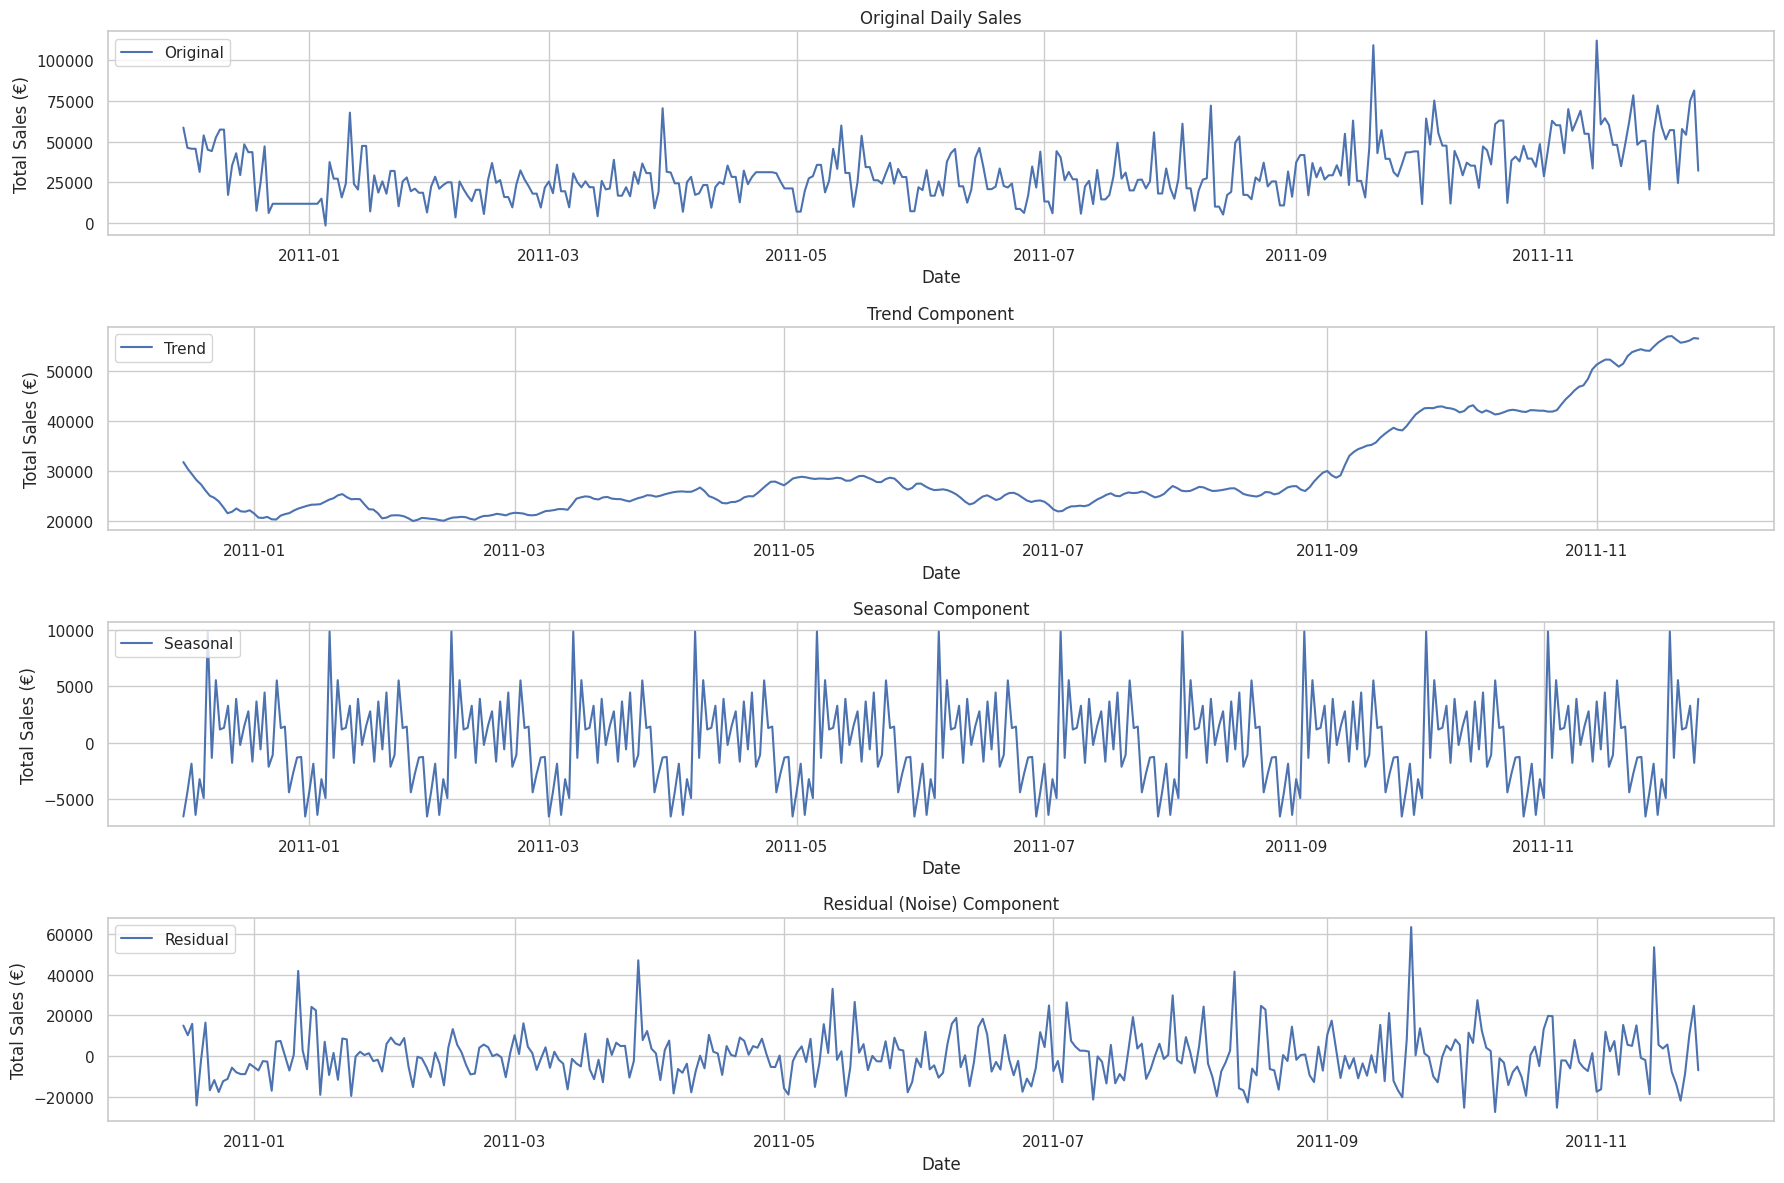

In [96]:
# Decompose the daily sales data to observe trend, seasonality, and noise after dealing with missing values
decomposition_30_days_fill = seasonal_decompose(df_daily_fill.dropna(), period=30)  # Using a frequency of 30 days
plot_seasonal_decompose(decomposition_30_days_fill, df_daily_fill)

The trend, seasonality are clear. There is a good upward trend and strong seasonality.

### Outliers in the dataset

A simple method used here to find outliers are z-statistic score which calculates how many standard deviations a data point is from the mean. For this we can consider a z-score greater than 3 or lesses than -3 as outliers.

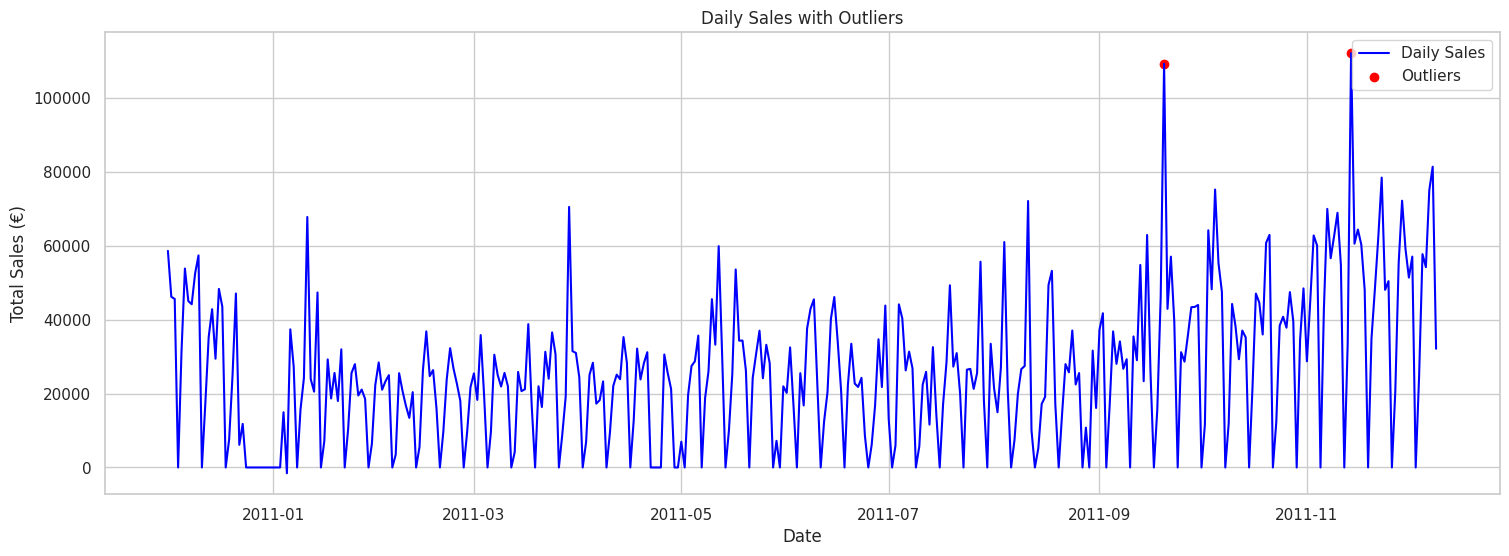

InvoiceDate
2011-09-20    109286.21
2011-11-14    112141.11
Name: TotalSales, dtype: float64

In [107]:
# Calculate the Z-score for the daily total sales
df_daily_zscore = zscore(df_daily_fill.dropna())

# Identify the outliers (Z-score > 3 or Z-score < -3)
outliers = df_daily[(df_daily_zscore > 3) | (df_daily_zscore < -3)]

# Plot the daily sales along with the outliers
plt.figure(figsize=(18, 6))
plt.plot(df_daily.index, df_daily.values, label='Daily Sales', color='blue')
plt.scatter(outliers.index, outliers.values, color='red', label='Outliers')
plt.title('Daily Sales with Outliers')
plt.xlabel('Date')
plt.ylabel('Total Sales (€)')
plt.legend()
plt.show()

# Display the outliers
outliers

There are two outliers. In september and november, these might be due to promotions or festival or holiday season.

We can assume this behaviour (as we do not know about the market) to be geniune and was user driven for this analysis and keep the outliers.

### The hourly sales pattern

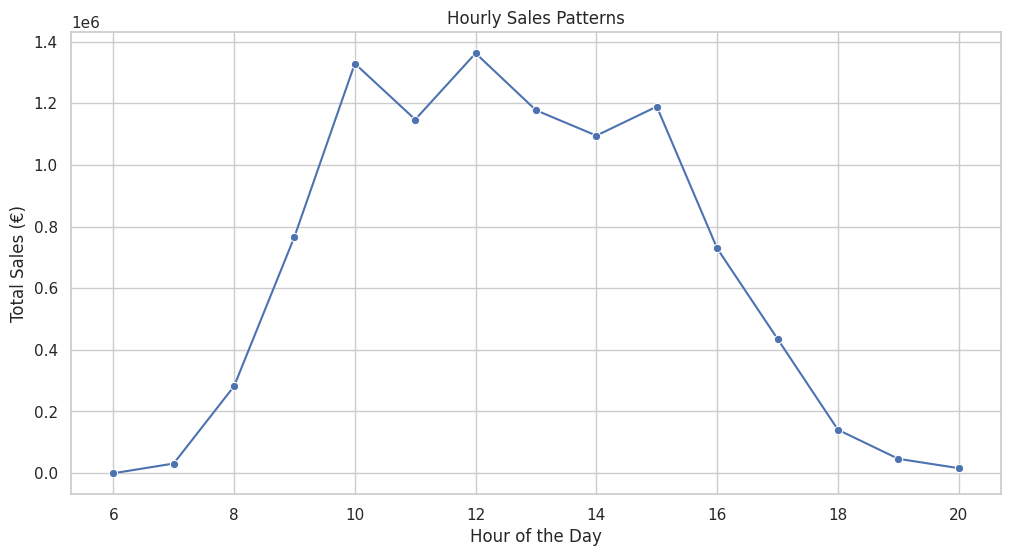

In [110]:
# Convert the index back to a column and reset the dataframe index
sales_df.reset_index(inplace=True)

# Extract the hour from the InvoiceDate
sales_df['Hour'] = sales_df['InvoiceDate'].dt.hour

# Group the data by Hour and sum the TotalSales
hourly_sales = sales_df.groupby('Hour')['TotalSales'].sum().sort_index()

# Plot the hourly sales data using a line plot for better visualization of the pattern
plt.figure(figsize=(12, 6))
sns.lineplot(x=hourly_sales.index, y=hourly_sales.values, marker='o')
plt.title('Hourly Sales Patterns')
plt.xlabel('Hour of the Day')
plt.ylabel('Total Sales (€)')
plt.grid(True)
plt.show()

#### Misc Hourly Analysis

Hourly Sales Data

<ipython-input-113-5c9984defd07>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_hourly = sales_df.resample('H').sum()['TotalSales']


<Axes: title={'center': 'Hourly Sales'}, xlabel='InvoiceDate'>

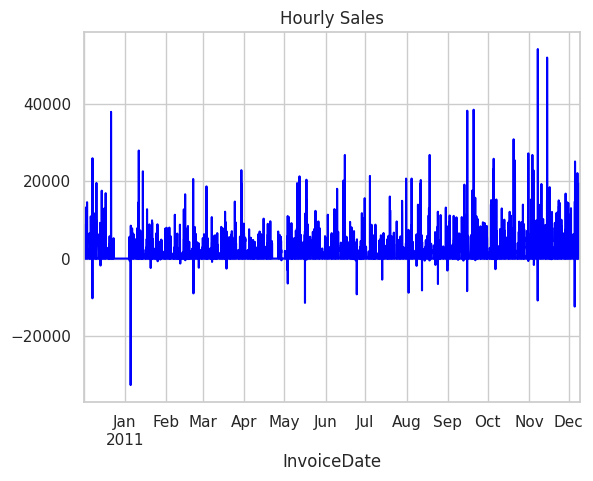

In [113]:
# sales_df.set_index('InvoiceDate', inplace=True)
df_hourly = sales_df.resample('H').sum()['TotalSales']
# df_daily_fill = df_daily.replace(0, method='ffill')

# Plot daily sales after filling the missing values
df_hourly.plot(title='Hourly Sales', color='blue')

The hourly sales data has too much of fluctuations.

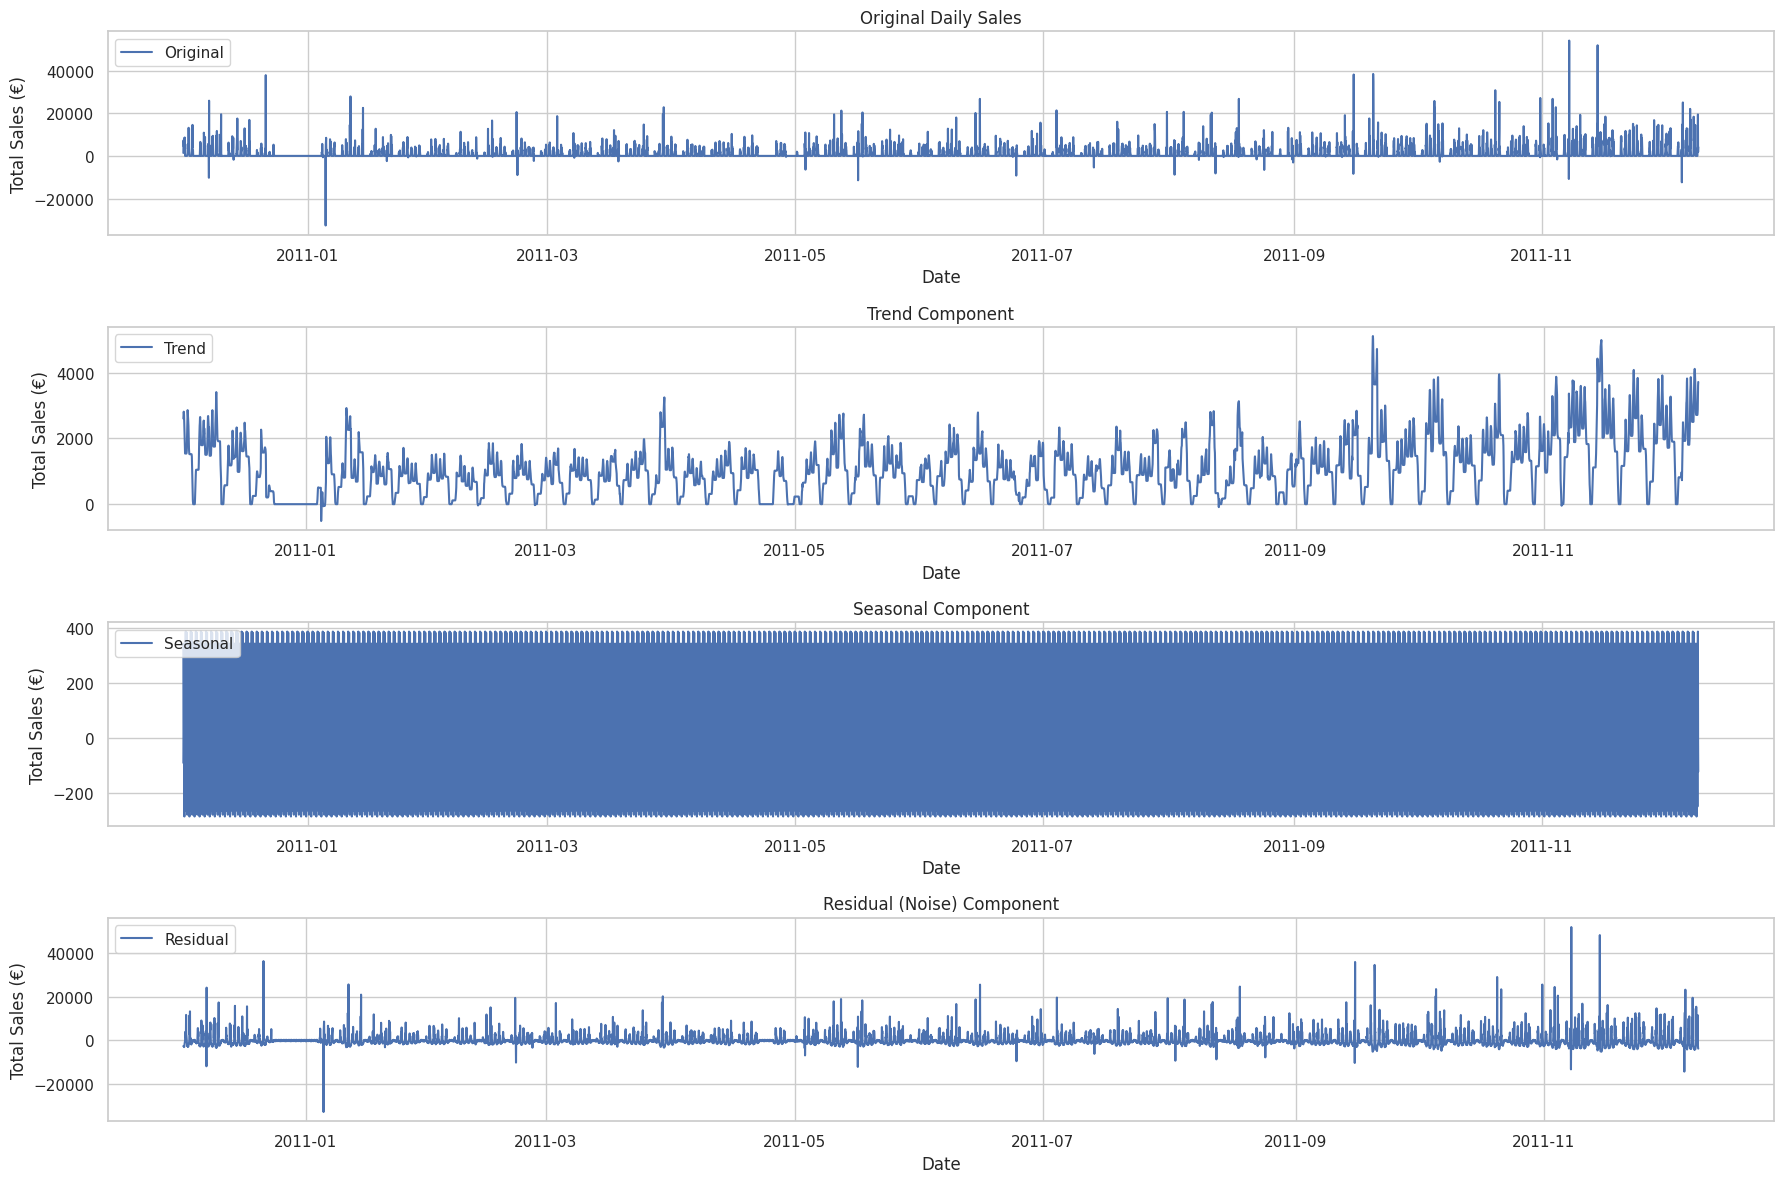

In [114]:
# Decompose the daily sales data to observe trend, seasonality, and noise after dealing with missing values
decomposition_hours = seasonal_decompose(df_hourly.dropna(), period=30)  # Using a frequency of 30 days
plot_seasonal_decompose(decomposition_hours, df_hourly)

Too much of noise

### Weekday vs Weekend sales

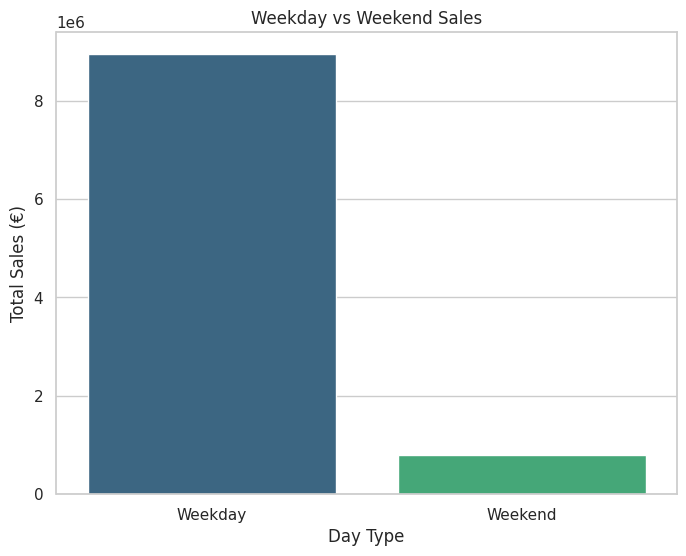

In [117]:
# Extract the weekday from the InvoiceDate (0 = Monday, 1 = Tuesday, etc.)
df_original['Weekday'] = df_original['InvoiceDate'].dt.weekday

# Map the weekdays to 'Weekday' and 'Weekend'
weekday_map = {0: 'Weekday', 1: 'Weekday', 2: 'Weekday', 3: 'Weekday', 4: 'Weekday', 5: 'Weekend', 6: 'Weekend'}
df_original['Weekday'] = df_original['Weekday'].map(weekday_map)

# Group the data by Weekday and sum the TotalSales
weekday_sales = df_original.groupby('Weekday')['TotalSales'].sum().sort_index()

# Plot the weekday vs weekend sales data
plt.figure(figsize=(8, 6))
sns.barplot(x=weekday_sales.index, y=weekday_sales.values, palette='viridis')
plt.title('Weekday vs Weekend Sales')
plt.xlabel('Day Type')
plt.ylabel('Total Sales (€)')
plt.show()

### Top 10 products

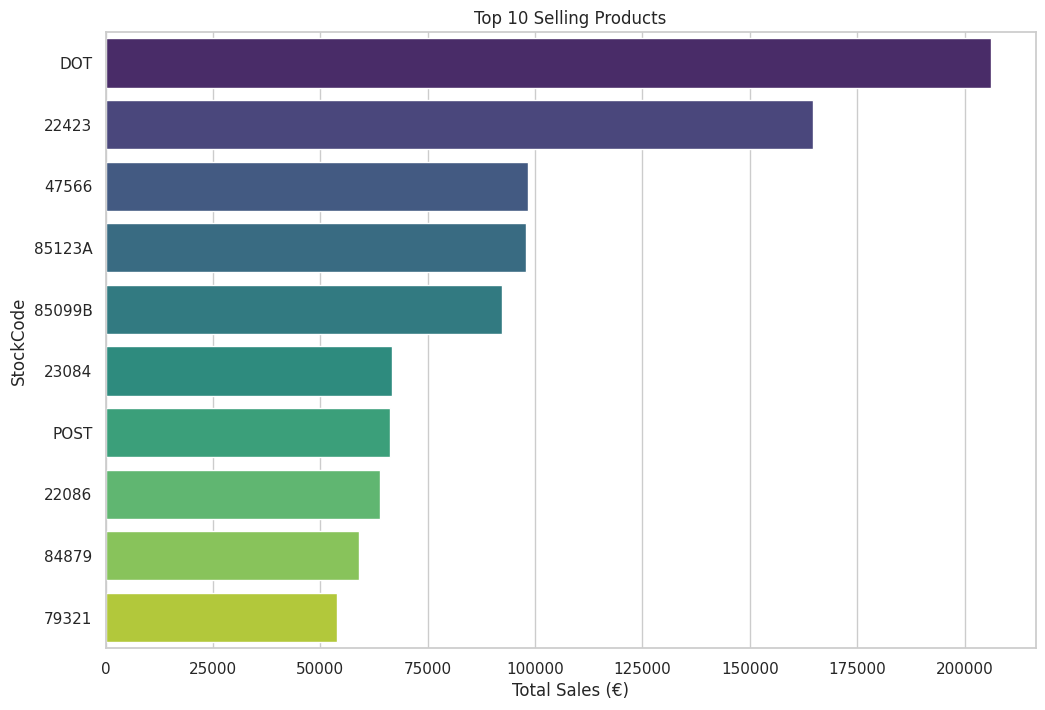

StockCode
DOT       206245.48
22423     164762.19
47566      98302.98
85123A     97894.50
85099B     92356.03
23084      66756.59
POST       66230.64
22086      63791.94
84879      58959.73
79321      53768.06
Name: TotalSales, dtype: float64

In [118]:
# Group the data by StockCode and sum the TotalSales
top_products = df_original.groupby('StockCode')['TotalSales'].sum().sort_values(ascending=False).head(10)

# Plot the top 10 selling products
plt.figure(figsize=(12, 8))
sns.barplot(x=top_products.values, y=top_products.index, palette='viridis')
plt.title('Top 10 Selling Products')
plt.xlabel('Total Sales (€)')
plt.ylabel('StockCode')
plt.show()

# Display the top 10 selling products
top_products

There are two non-product items present.
DOT and POST.

They are 'DOTCOM POSTAGE' and 'POSTAGE'. They refer to cost of shipping.

### Observations

1. The number of data points after aggregation are less
2. There are missing days where there are no sales data present. They were assumed as missing data for this analaysis as we do not know the domain and source of this dataset.
3. The negative data points in the total sales after aggregation are kept as they might be due to geniune returns and charges based on the dataset.
4. There is a clear trend and seasonality in the dataset.
5. Weekday sales are more than weekend sales
6. Hourly sales data are more fluctuating and they contain more residual noise.
7. There is a clear hourly and weekly sales pattern.
8. Among the top products DOTCOM POSTAGE ranks the top non-product as it might be involved with almost all the transactions.
9. There are 2 outliers detected based on Z-statistic score. They are kept in the dataset with the assumption that these outliers might be genuinely due to promotions, festivals or holiday seasons as they are an all occassion gift shop. Most of the customers are wholesalers.
10. Since, the retailer is based out of UK, the highest sales was yielded in UK.

# Dataset conversion

In [123]:
df = pd.read_excel(file_path, sheet_name='Online Retail')
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France


In [124]:
df.to_csv('/content/drive/MyDrive/Sales Data/Online_Retail.csv', index=False)